# Task 2 Prediction Model


In this notebook I'll implement the (i) K-Means clustering (ii) Prediction Model 

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_pickle('../data/processed/multiclass/train_all_first.pickle')

In [3]:
df_train.head()

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query,...,max_temp,min_temp,weather,wind,weather_dy,weather_dyq,weather_q,weather_qdy,weather_xq,weather_xydy
0,753082.0,2018-10-01 00:00:11,5.0,101467.0,2018-10-01 00:00:10,116.34,39.90,116.34,39.90,0.000000,...,24,12,q,45,0,0,1,0,0,0
1,756507.0,2018-10-01 00:00:27,9.0,171074.0,2018-10-01 00:00:11,116.58,39.92,116.27,40.00,0.320156,...,24,12,q,45,0,0,1,0,0,0
2,739221.0,NaN,0.0,141511.0,2018-10-01 00:00:22,116.50,40.03,116.42,39.84,0.206155,...,24,12,q,45,0,0,1,0,0,0
3,776916.0,2018-10-01 00:01:10,7.0,142228.0,2018-10-01 00:00:46,116.51,39.87,116.39,39.91,0.126491,...,24,12,q,45,0,0,1,0,0,0
4,762813.0,2018-10-01 00:00:47,5.0,106323.0,2018-10-01 00:00:47,116.35,39.98,116.35,39.98,0.000000,...,24,12,q,45,0,0,1,0,0,0


In [4]:
df_test = pd.read_pickle('../data/processed/multiclass/test_all_first.pickle')

In [5]:
df_test.head()

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query,...,max_temp,min_temp,weather,wind,weather_dy,weather_dyq,weather_q,weather_qdy,weather_xq,weather_xydy
0,2092996.0,2018-11-18 05:04:15,2.0,115984.0,2018-11-18 05:04:08,116.31,39.89,116.27,39.90,0.041231,...,11,-3,q,34,0,0,1,0,0,0
1,2103448.0,2018-11-18 05:04:34,1.0,201117.0,2018-11-18 05:04:27,116.24,40.35,116.36,39.76,0.602080,...,11,-3,q,34,0,0,1,0,0,0
2,2097156.0,2018-11-18 05:06:22,5.0,-1.0,2018-11-18 05:06:18,116.42,39.90,116.42,39.90,0.000000,...,11,-3,q,34,0,0,1,0,0,0
3,2104284.0,2018-11-18 05:11:39,1.0,163419.0,2018-11-18 05:10:51,116.41,39.89,116.41,39.63,0.260000,...,11,-3,q,34,0,0,1,0,0,0
4,2090191.0,2018-11-18 05:18:15,2.0,158967.0,2018-11-18 05:17:18,116.29,40.14,116.23,39.86,0.286356,...,11,-3,q,34,0,0,1,0,0,0


In [6]:
# Concat all df_train and df_test
# We use the whole DataFrame because we create own train and test sets
df = pd.concat([df_train, df_test])

In [7]:
assert len(df) == len(df_train) + len(df_test), 'Length is not the same!'

In [8]:
df.head()

,sid,click_time,click_mode,pid,req_time,o_long,o_lat,d_long,d_lat,distance_query,...,max_temp,min_temp,weather,wind,weather_dy,weather_dyq,weather_q,weather_qdy,weather_xq,weather_xydy
0,753082.0,2018-10-01 00:00:11,5.0,101467.0,2018-10-01 00:00:10,116.34,39.90,116.34,39.90,0.000000,...,24,12,q,45,0,0,1,0,0,0
1,756507.0,2018-10-01 00:00:27,9.0,171074.0,2018-10-01 00:00:11,116.58,39.92,116.27,40.00,0.320156,...,24,12,q,45,0,0,1,0,0,0
2,739221.0,NaN,0.0,141511.0,2018-10-01 00:00:22,116.50,40.03,116.42,39.84,0.206155,...,24,12,q,45,0,0,1,0,0,0
3,776916.0,2018-10-01 00:01:10,7.0,142228.0,2018-10-01 00:00:46,116.51,39.87,116.39,39.91,0.126491,...,24,12,q,45,0,0,1,0,0,0
4,762813.0,2018-10-01 00:00:47,5.0,106323.0,2018-10-01 00:00:47,116.35,39.98,116.35,39.98,0.000000,...,24,12,q,45,0,0,1,0,0,0


In [29]:
!mkdir ../data/interim/task2/

## K-Means cluster on pid table

In [9]:
df_pid = pd.read_csv('../data/raw/profiles.csv')

In [10]:
df_pid.head()

,pid,p0,p1,p2,p3,p4,p5,p6,p7,p8,...,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65
0,196356,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,204083,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,170667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,115511,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,129719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y_hat = KMeans(n_clusters=4).fit_predict(df_pid.iloc[:,1:])

In [12]:
df_pid_labels = df_pid.assign(label = y_hat)

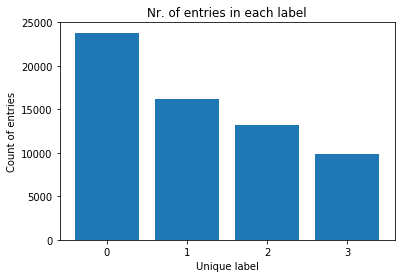

In [13]:
plt.bar(df_pid_labels.label.unique(), df_pid_labels.groupby('label').count()['pid']);
plt.xlabel('Unique label');
plt.ylabel('Count of entries');
plt.xticks(range(0,4));
plt.title("Nr. of entries in each label");

In [25]:
label_matrix = df_pid_labels[['pid', 'label']]
label_matrix.columns = ['pid', 'kmeans_4']

In [27]:
label_matrix.to_pickle('../data/interim/label_matrix.pickle')

## Prepare Data

- Delete all without PID
- Random test, train set

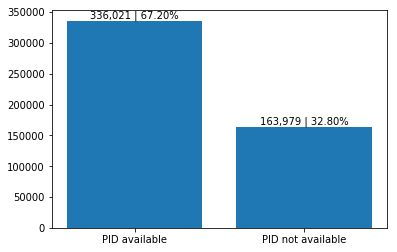

In [14]:
count_na = df[df.pid == -1].shape[0]
y = [(len(df) - count_na), count_na]

y_percentage = [(len(df) - count_na) / (len(df)), count_na / len(df)]

fig, ax = plt.subplots();
ax.bar(['PID available', 'PID not available'], y);

rects = ax.patches



for rect, label1, label2 in zip(rects, y, y_percentage):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, "{:,} | {:.2f}%".format(label1, (label2*100)),
            ha='center', va='bottom')

In [31]:
# Delete all without PID
df_processed = df[df.pid != -1]

In [32]:
df_processed.shape

(336021, 195)

In [33]:
df_processed.to_pickle('../data/interim/task2/df_pp.pickle')

In [17]:
df_pid_labels.head()

,pid,p0,p1,p2,p3,p4,p5,p6,p7,p8,...,p57,p58,p59,p60,p61,p62,p63,p64,p65,label
0,196356,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,204083,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,170667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,115511,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,129719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
# Join df_processed and df_pid_labels to get the labels
df_processed = pd.merge(df_processed, df_pid_labels[['pid', 'label']], on='pid')

In [19]:
df_processed.to_pickle('../data/processed/multiclass/task2_df_example.pickle')

## Read in feature file

In [20]:
features = pd.read_pickle('../data/processed/features/task_2.pickle')

In [21]:
df_processed = df_processed[features]

In [22]:
df_processed.head()

,o_long,o_lat,d_long,d_lat,mode_0_available,mode_1_available,mode_2_available,mode_3_available,mode_4_available,mode_5_available,...,weather_dy,weather_q,weather_xydy,weather_xq,max_temp,min_temp,wind,req_weekend,is_holiday,label
0,116.34,39.90,116.34,39.90,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,24,12,45,0,1,2
1,116.39,39.87,116.39,39.91,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,0,24,12,45,0,1,2
2,116.37,39.86,116.39,39.91,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,0,24,12,45,0,1,2
3,116.37,39.89,116.39,39.91,0.0,1.0,0.0,1.0,1.0,1.0,...,0,1,0,0,24,12,45,0,1,2
4,116.34,39.90,116.39,39.78,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,0,24,12,45,0,1,2


## Test, train set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df_processed.iloc[:,:-1].values
y = df_processed.iloc[:, -1].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True)

## Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier


In [26]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
y_preds = rf.predict(X_test)

In [28]:
from sklearn.metrics import f1_score
f1_score(y_test, y_preds, average='weighted')

0.45149075002058

## K-Fold 

In [36]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X, y)

print(kf)  


KFold(n_splits=5, random_state=42, shuffle=True)


In [45]:
count_iter = 0

for train_index, test_index in kf.split(X, y):
    count_iter += 1
    print('Split Nr. {}'.format(count_iter))
    print("Train size: {}, Test size: {}".format(len(train_index), len(test_index)))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_preds = rf.predict(X_test)
    print("F1 Score at split {} is {:.4f} %".format(count_iter, f1_score(y_test, y_preds, average='weighted')))
    print("====================================================================")
    

Split Nr. 1
Train size: 268816, Test size: 67205
F1 Score at split 1 is 0.4497 %
Split Nr. 2
Train size: 268817, Test size: 67204
F1 Score at split 2 is 0.4442 %
Split Nr. 3
Train size: 268817, Test size: 67204
F1 Score at split 3 is 0.4425 %
Split Nr. 4
Train size: 268817, Test size: 67204
F1 Score at split 4 is 0.4473 %
Split Nr. 5
Train size: 268817, Test size: 67204
F1 Score at split 5 is 0.4471 %
